<br>

#### 1. 단어의 검색 결과 출력하기
- 다음 사전 (https://alldic.daum.net) 에 ‘happiness’ 단어를 검색하였을 때 출력 되는 화면에서 단어와 단어의 의미를 출력한다

In [2]:
# BeautifulSoup은 Anaconda 설치 시 이미 설치되어 있으므로 별도 설치가 불필요합니다.

# !pip install beautifulsoup4==4.9.3

In [3]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen 

In [4]:
# 검색하고 싶은 단어 입력하기
word = 'happiness'

# 불러오려는 url 입력하기 
# 디폴트 url에 string 타입의 word 변수를 합쳐서 url 변수 생성
url = 'https://alldic.daum.net/search.do?q=' + word

# urlopen 함수를 통해 web 변수를 생성
web = ?(url)   # urlopen(url).read().decode('utf-8')

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(?, 'html.parser')

print(web_page)

#### Parser 들의 장단점
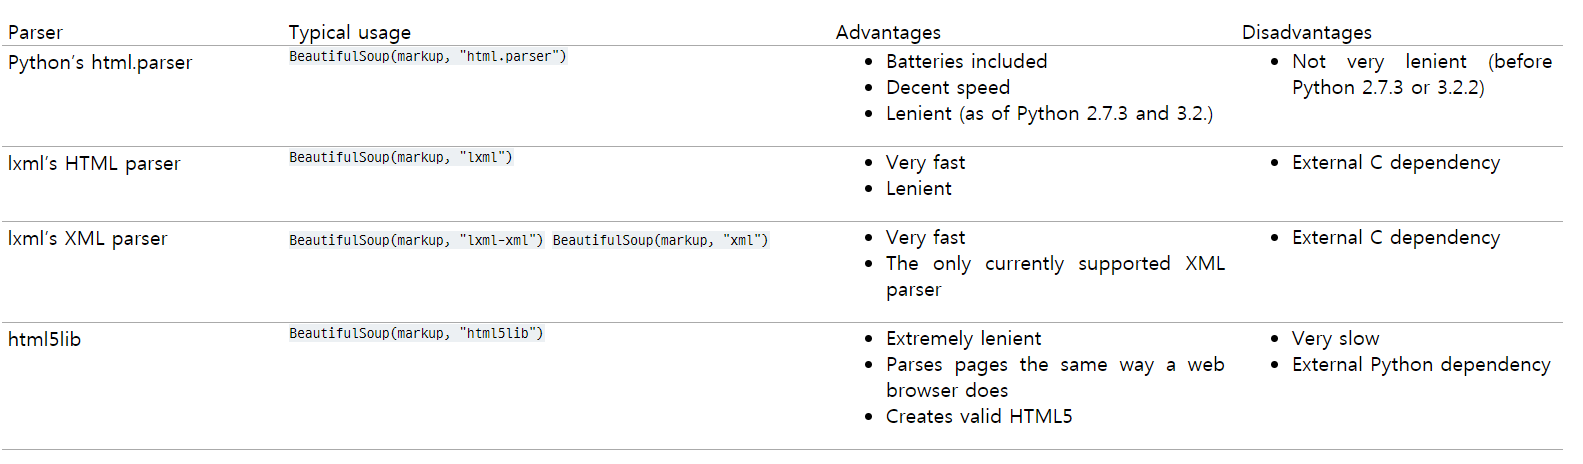

**Scraping에서 Parsing이란?**
- HTML이나 XML, JavaScript 등으로 쓰여진 소스들을 각 요소별로 나누는 것
- 이 때, 이러한 parsing을 진행해주는 것을 parser라고 부른다.

In [6]:
# 찾는 단어 (대상이 하나일 때)

box1 = web_page.?('span', {'class': 'txt_emph1'}) # 찾다
print(box1)
# print(box1.get_?) # 태그를 걷어내고 내부의 텍스트만 꺼내고 싶을 때 

In [8]:
# 단어의 뜻 (대상이 여러개일 때)

box2 = web_page.?('span', {'class': 'txt_search'}) # 모두 찾다
box2

In [26]:
# 단어와 단어의 뜻 출력하기

print(box1.?()) # get_ + Tab!
print()

for defintion in web_page.find_all('span', {'class': 'txt_search'}):
    print(defintion.?()) 

<br>
<br>

#### 2. 영화 정보 출력하기
- 네이버영화 사이트에서 영화 Spider-Man: No Way Home에 대한 각종 정보를 스크래이핑

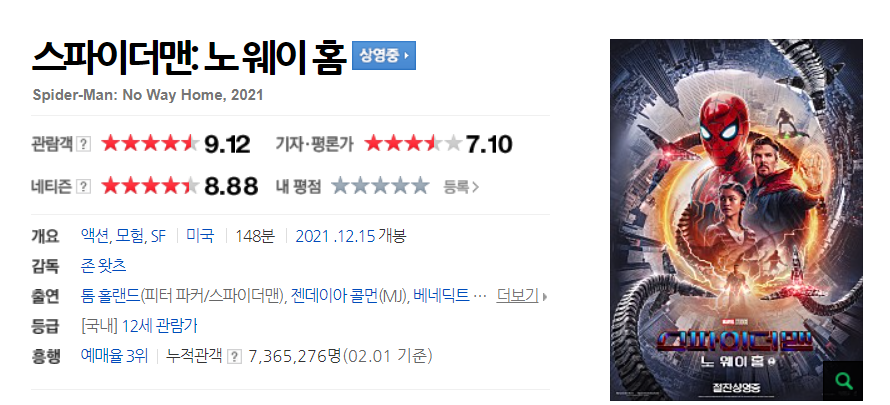

In [27]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

#### 2-1) 영화 제목 & 줄거리 스크래이핑

In [9]:
# 불러오려는 url 입력하기 (네이버영화 - Spider-Man: No Way Home (2021) )
url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=208077' # 영화에 대한 기본 정보가 담긴 페이지

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [ ]:
# 영화 제목을 출력한다

# 영화 제목이 담긴 a 태그를 감싼 h3 태그를 먼저 찾고, 그 안에서 a 태그를 찾는다.
title = web_page.find(?, {?:?}).find(?) 

print('Movie Title:')
print(title.get_text())

In [ ]:
# 영화 줄거리를 출력한다

summary = web_page.find(?, {?: ?})

print('Movie Summary:')
print(summary.get_text())

#### 2-2) 감독 이름 & 출연 배우 이름 스크래이핑

In [ ]:
# 불러오려는 url 입력하기 (네이버영화 - Spider-Man: No Way Home (2021) )
url = 'https://movie.naver.com/movie/bi/mi/detail.naver?code=208077' # 영화에 대한 배우/제작진 정보가 담긴 페이지

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [ ]:
# 감독 이름을 출력한다

# 감독 이름이 담긴 a 태그를 감싼 div 태그를 먼저 찾고, 그 안에서 a 태그를 찾는다.
director = web_page.find(?, {?:?}).find(?) 

print('Director:')
print(director.get_text())

In [ ]:
# 출연 배우들의 이름을 출력한다

# 배우들의 이름이 담긴 div 태그를 먼저 찾는다.
actor_list = web_page.find(?, {?:?})

# 찾아낸 div 태그 안에서 배우 각각의 이름이 담긴 a 태그들을 모두 찾는다.
actor_names = actor_list.find_all(?, {?:?})

for actor in actor_names:
    print(actor.get_text())

#### 2-3) 영화 리뷰 제목 스크래이핑

In [32]:
# 불러오려는 url 입력하기 (네이버영화 - Spider-Man: No Way Home (2021) )
url = 'https://movie.naver.com/movie/bi/mi/review.naver?code=208077' # 영화에 대한 리뷰가 담긴 페이지

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [35]:
# 영화 리뷰들의 제목을 출력한다.

# 영화 리뷰들이 담긴 div 태그를 먼저 찾는다.
review_list = web_page.find(?, {?:?})

# 찾아낸 div 태그 안에서 리뷰 각각의 제목이 담긴 strong 태그들을 모두 찾는다.
review_titles = review_list.find_all(?)

for title in review_titles:
    print(title.get_text())

<br>
<br>

#### 3. 신문 기사 출력하고 저장하기
- 시애틀의 대표적인 신문 Seattle Times에서 글을 불러와 파일로 저장하기

In [36]:
# 불러오려는 url 입력하기
url = 'https://www.seattletimes.com/business/real-estate/zillows-zestimate-overvalued-a-washington-home-by-700-percent-in-a-case-of-algorithms-gone-wrong/'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

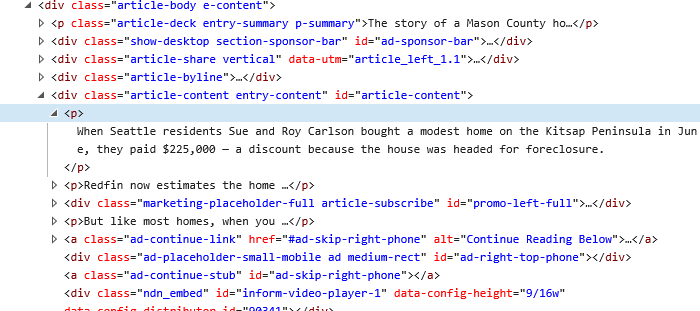

In [38]:
# Settle Times에 기사를 불러온다
with open('seattletimes.txt','w', encoding = 'utf-8') as f:
    
    times = source.find(?,{?: ?})
    article = times.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')

<br>
<br>

#### (Extra) Brunch 게시글 출력하고 저장하기
- 브런치에 실린 게시글을 불러와 파일로 저장하기

In [39]:
# 불러오려는 url 입력하기
url = 'https://brunch.co.kr/@imagineer/267'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

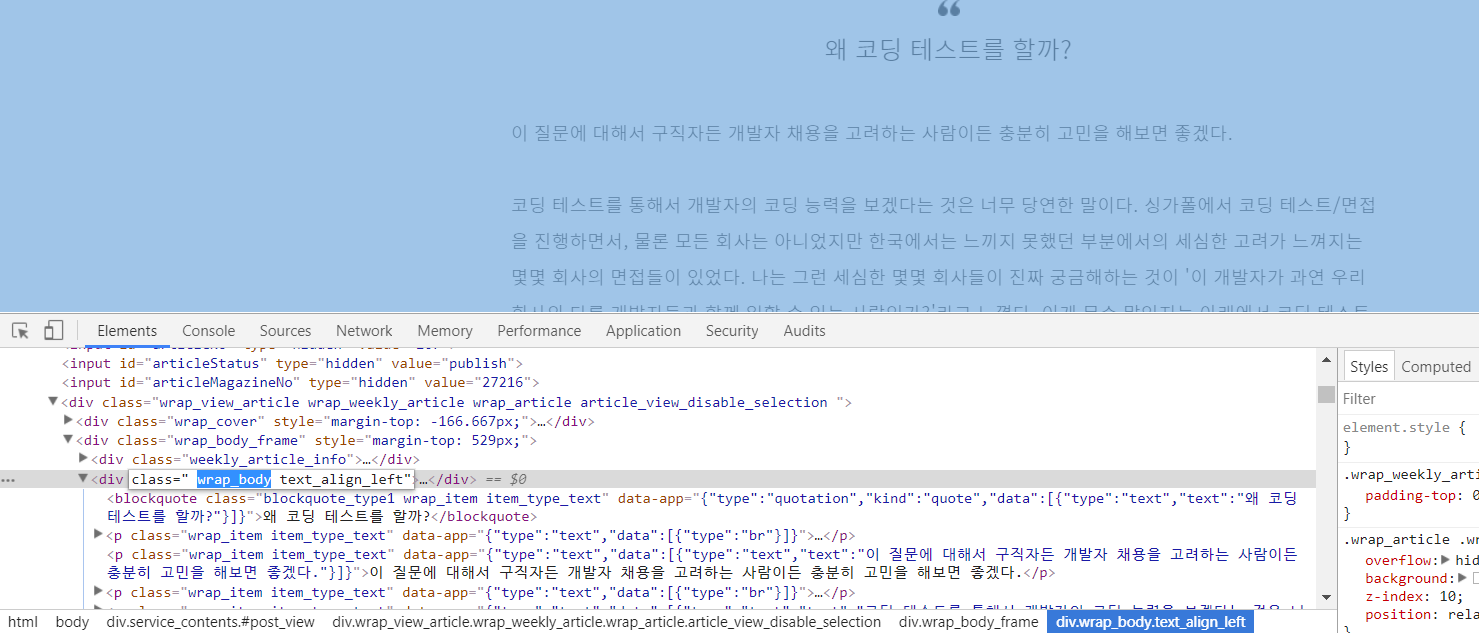

In [42]:
# Brunch 에 있는 글을 불러온다
with open('brunch.txt','w',encoding = 'utf-8') as f:
    
    all_text = source.find(?,{?: ?})
    article = all_text.find_all(?)
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')

In [ ]:
for i in range(3):
    text = 'Python' + str(i)
    print(text)

In [46]:
# Save multiple articles automatically

# @imagineer 님의 글 10개를 자동으로 가져와 저장하는 코드를 작성해보세요!
# Hint 1 : str에는 str만 더할 수 있어요!
# Hint 2 : @imagineer님 글의 URL은 몇 번부터 시작할까요?

for i in ?(10):
    url = 'https://brunch.co.kr/@imagineer/' + ?(?)
    web = urlopen(url)
    source = BeautifulSoup(web, 'html.parser')
    
    with open('brunch_all.txt', ?, encoding = 'utf-8') as f:
        
        all_text = source.find(?,{?: ?})
        article = all_text.find_all(?)

        for content in article:
            print(content.get_text())
            f.write(content.get_text() + '\n')
            
# (Additional) 예외처리 (try & except pass 적용해보기)